In [1]:
#pip install opencv-python pytesseract

In [2]:
import cv2
import pytesseract
import json



from PIL import Image


In [3]:
from PIL import Image

In [6]:
image = cv2.imread('/Users/amitpandey/Desktop/Screenshot 2023-07-06 at 12.07.11 PM.png')

In [7]:
if image is not None:
    print(image)
    # Image loaded successfully
    
else:
    # Failed to load the image
    print("Error: Failed to load the image.")


[[[198 198 198]
  [222 222 222]
  [249 249 249]
  ...
  [253 253 253]
  [255 255 255]
  [207 207 207]]

 [[143 143 143]
  [196 196 196]
  [245 245 245]
  ...
  [253 253 253]
  [255 255 255]
  [207 207 207]]

 [[252 252 252]
  [253 253 253]
  [255 255 255]
  ...
  [253 253 253]
  [255 255 255]
  [207 207 207]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 251 252]
  [255 255 255]
  [207 207 207]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [207 207 207]]

 [[225 225 241]
  [225 225 241]
  [225 225 241]
  ...
  [221 221 240]
  [241 240 254]
  [209 209 208]]]


In [8]:
#Open image with PIL
img = Image.open('/Users/amitpandey/Desktop/Screenshot 2023-07-06 at 12.07.11 PM.png')


In [9]:
from PIL import Image

# Open the image file
image = Image.open('/Users/amitpandey/Desktop/Screenshot 2023-07-06 at 12.07.11 PM.png')

# Display the image
image.show()

In [10]:
print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1107x318 at 0x11E5A7490>


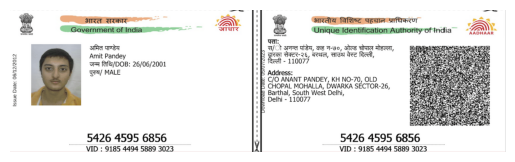

In [11]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.show()

In [12]:
text = pytesseract.image_to_string(img)

In [13]:
text

'Issue Date: 06/12/2012\n\nft Tes\n\nAmit Pandey\n\n‘ar fAf&/DOB: 26/06/2001\ney MALE\n\n5426 4595 6856\n\nVID : 9185 4494 5889 3023\n\na ‘oer a, FE F-00, oes Sag ee,\nEa\n\na YANANT PANDEY, KH NO-70, OLD\nCHOPAL MOHALLA, DWARKA SECTOR-26,\nBarthal, South West Delhi,\n\nDelhi - 110077\n\n5426 4595 6856\n\nVID : 9185 4494 5889 3023\n'

In [21]:
# Split the extracted text into lines
lines = text.split('\n')

# Create a dictionary to store the extracted data
data = {}

# Process each line of text and extract relevant information
for line in lines:
    # Extract specific fields based on their position or patterns
    if 'Aadhaar' in line:
        data['aadhaar_number'] = line.split(' ')[-1]
    elif 'Name' in line:
        data['name'] = ' '.join(line.split(':')[1:]).strip()
    elif 'DOB' in line:
        data['date_of_birth'] = line.split(':')[1].strip()
        
    elif 'VID' in line:
        data['vid'] = line.split(':')[1].strip()
        
    

# Print the extracted data
print(data)


{'date_of_birth': '26/06/2001', 'vid': '9185 4494 5889 3023'}


In [ ]:
#I havent saved the extracted data in json format as other information are 
#left out to be extracted here like name, aadhar no

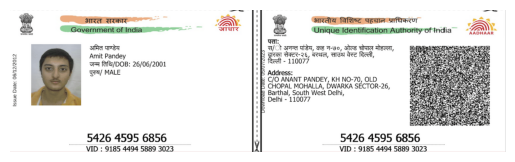

In [22]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.show()

#### there is no name/aadhar no in line thus its not showing any of both.

* the aadhar card should have this format ~ Name: Amit Pandey



* whereas its in this format ~ Amit Pandey

In [16]:
import cv2
import pytesseract

# Path to Tesseract
pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'

# Loading the image
image_path = '/Users/amitpandey/Desktop/Screenshot 2023-07-06 at 12.07.11 PM.png'
image = cv2.imread(image_path)

# Converting the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply OCR using Tesseract
extracted_text = pytesseract.image_to_string(gray, lang='eng')

# Process the extracted text to find the address
lines = extracted_text.split('\n')
address_lines = []
address_found = False

for line in lines:
    # Look for keywords or patterns indicating the address
    if 'Address' in line or 'ADDR' in line or 'add' in line.lower():
        address_found = True
        continue
    
    # Add the line to the address if it has been found
    if address_found:
        address_lines.append(line)

# Join the address lines into a single string
address = ' '.join(address_lines)

# Print the extracted address
print("Extracted Address:")
print(address)

Extracted Address:
8 | ' £ C/O ANANT PANDEY, KH NO-70, OLD : | f CHOPAL MOHALLA, DWARKA SECTOR-26, g B Barthal, South West Delhi, 3 ‘ E Delhi - 110077 5426 4595 6856 1 5426 4595 6856  VID : 9185 4494 5889 3023 V VID : 9185 4494 5889 3023 


In [ ]:
#Here its displaying every text but it should have displayed only address